# XGBoost example

**Example using the xgb function in the MLRegression module**

The **xgb** function in the MLRegression module provides output of fitted regression model and summary statistics using the XGBoost function

The **xgb** function standardizes the X input by default. 

This example shows how to cross-validate the model with independent training and testing data subsets before fitting the final model with all of the data.

#### Example data set

This example uses the diabetes data described in the following tutorial by sklearn:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py


Before running this notebook, first install the MLRegression module in your environment, if it is not already installed, using one of the following lines in the next cell:

In [1]:
# # Run the following commands to install MLRegression for the first time
# !pip install git+https://github.com/gjpelletier/MLRegression.git

# # Run the following commands to upgrade MLRegression to the latest versions
# !pip install git+https://github.com/gjpelletier/MLRegression.git --upgrade

## Read X and y from the sklearn diabetes data set

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)

## Split X and y into cross-validation train and test subsets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model with the training data subset

Fitting XGBRegressor model, please wait ...


XGBRegressor statistics of fitted model in model_outputs['stats']:


| Statistic          |    XGBRegressor |
|:-------------------|----------------:|
| r-squared          |     0.84721     |
| adjusted r-squared |     0.842742    |
| n_samples          |   353           |
| df residuals       |   343           |
| df model           |     9           |
| F-statistic        |   211.323       |
| Prob (F-statistic) |     1.11022e-16 |
| RMSE               |    30.4699      |
| Log-Likelihood     | -1706.99        |
| AIC                |  3433.99        |
| BIC                |  3472.65        |


Done
Time elapsed: 11.66 sec


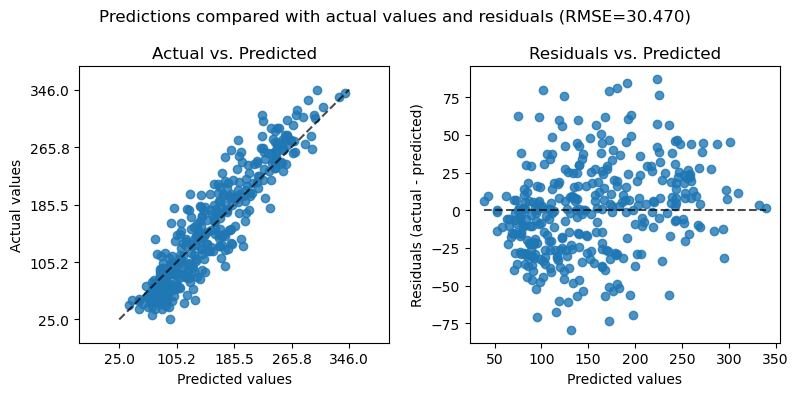

In [15]:
from MLRegression import xgb
train_model, train_output = xgb(X_train, y_train,
    learning_rate=.1,
    n_estimators=100,
    max_depth=3, 
    min_child_weight=0,
    gamma=0, 
    subsample=0.7,
    colsample_bytree=0.7,
    objective='reg:squarederror', 
    scale_pos_weight=1, 
    random_state=42,
    reg_alpha=1)                               

## Test the model with the testing data subset

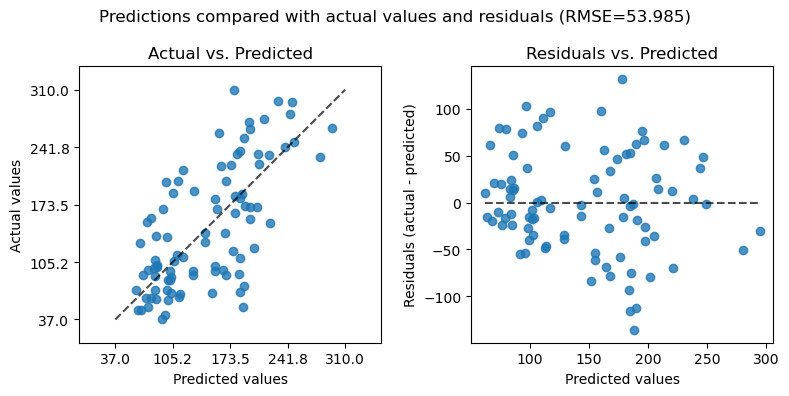

In [16]:
from MLRegression import plot_predictions_from_test
fig = plot_predictions_from_test(train_model, X_test, y_test, scaler=train_output['scaler'])
fig.savefig("XGBRegressor_predictions_test.png", dpi=300)

## Final fit of the model using all of the X and y data

Fitting XGBRegressor model, please wait ...


XGBRegressor statistics of fitted model in model_outputs['stats']:


| Statistic          |    XGBRegressor |
|:-------------------|----------------:|
| r-squared          |     0.805615    |
| adjusted r-squared |     0.801105    |
| n_samples          |   442           |
| df residuals       |   432           |
| df model           |     9           |
| F-statistic        |   198.932       |
| Prob (F-statistic) |     1.11022e-16 |
| RMSE               |    33.9512      |
| Log-Likelihood     | -2185.19        |
| AIC                |  4390.37        |
| BIC                |  4431.29        |


Done
Time elapsed: 11.35 sec


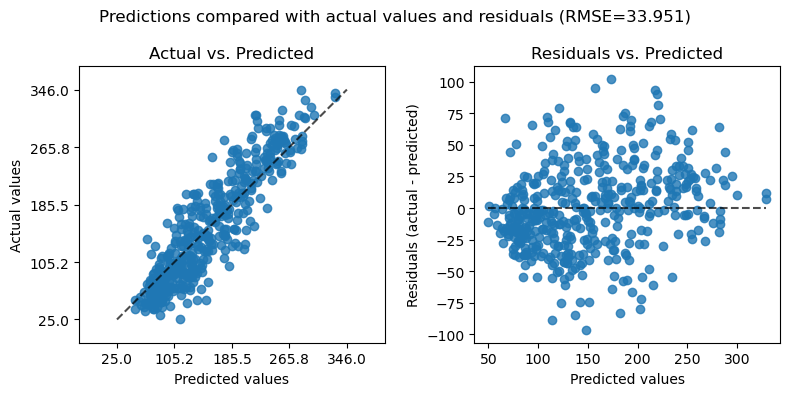

In [17]:
from MLRegression import xgb
final_model, final_output = xgb(X, y,
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3, 
    min_child_weight=0,
    gamma=0, 
    subsample=0.7,
    colsample_bytree=0.7,
    objective='reg:squarederror', 
    scale_pos_weight=1, 
    random_state=42,
    reg_alpha=1)                               

## User instructions

In [7]:
help(xgb)

Help on function xgb in module MLRegression:

xgb(X, y, **kwargs)
    Linear regression with XGBoost
    Beta version

    by
    Greg Pelletier
    gjpelletier@gmail.com
    03-June-2025

    REQUIRED INPUTS (X and y should have same number of rows and
    only contain real numbers)
    X = dataframe of the candidate independent variables
        (as many columns of data as needed)
    y = dataframe of the dependent variable (one column of data)

    OPTIONAL KEYWORD ARGUMENTS
    **kwargs (optional keyword arguments):
        verbose= 'on' (default) or 'off'
        standardize= 'on' (default) or 'off' where
            'on': standardize X using sklearn.preprocessing StandardScaler
            'off': do not standardize X (only used if X is already standardized)
        n_estimators= 100,          # Number of boosting rounds (trees).
        max_depth= 6,               # Maximum depth of a tree.
        learning_rate= 0.3,         # Step size shrinkage (also called eta).
        verbo